# Basic Image Recognition Using Neural Nets

In This project, we will be utilizing feed-forward, convoluted neural networks to classify images.

Neural networks are ideal for image classification problems due to their ability to break down the recognition into hierarchical steps for each hidden layer of the neural net.

For instance:

- The first layer one might be taught to recognize a small feature of the face, such as the edge or outline of the ear, eye, nose etc.

- The second layer might piece those disparate edges or chunks into a single recognizable chunk of the face itself.

- The third layer might be able to approximate the entire face itself, and be able to reliably predict the identity of the person.

## The Dataset

To conduct this project, we will be utilizing a [dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits) that comes pre-loaded with the [sklearn library](https://scikit-learn.org/stable/).  

The load_digits function of sklearn contains the dataset of handwritten digits collected by the [UCI Repository](https://archive.ics.uci.edu/ml/index.php).

Each image contained in the dataset is made up of a row of 8 pixels, with 8 rows making up a complete 8x8 pixel image.  To view the image, we simply stack the rows and plot them with matplotlib.

In [194]:
# importing the dataset from the sklearn.datasets
from sklearn.datasets import load_digits

# importing other relevant modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [195]:
# viewing format of dataset for data prep, eventually we want it in a
# pandas dataframe

image_array = load_digits()

image_array.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [196]:
# converting the data (or features) into a pandas dataframe

data = pd.DataFrame(image_array['data'])

print(data.shape)

data.head()

(1797, 64)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [197]:
# converting the labels into a pandas series

labels = pd.Series(image_array['target'])

print(labels.shape)

labels.head()

(1797,)


0    0
1    1
2    2
3    3
4    4
dtype: int32

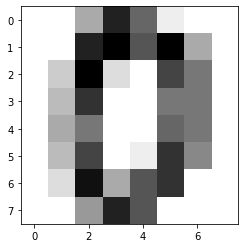

In [198]:
# displaying the images by reshaping the rows and using plt.imshow to chart them

image_1 = data.iloc[0]        # first row in dataset
image_1_vals = image_1.values  # values extracted
image_1 = image_1_vals.reshape(8,8)  # reshaped into a grid to chart

plt.imshow(image_1, cmap='gray_r')  # converting to grayscale and plotting


### Next, let's view a few more of the images to get a rough idea of what our dataset appears as to the human eye.


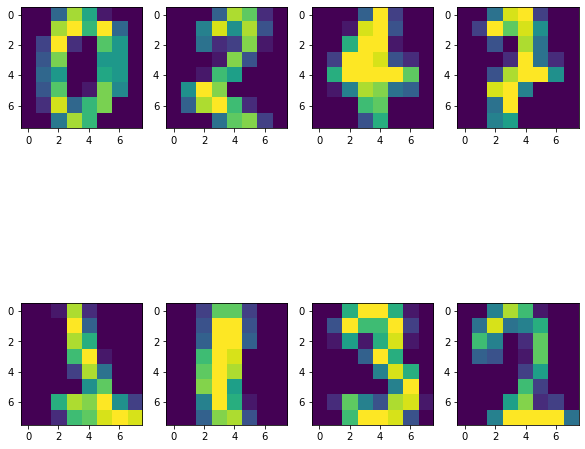

In [199]:
# plotting a few more images from our dataset using a loop
# we will create a plot with two rows and four columns

fig = plt.figure(figsize=(10,10))  # creating figure to hold our images

top_row = [0,50,250,350]  # images for the top row

bot_row = [1000, 1250, 1350, 1400] # images for the bottom row 

# filling our chartwith images
for i in range(4):
    image = data.iloc[top_row[i]]   # grabbing each image from top_row list
    image = image.values       # we only want the values from this series
    image = image.reshape(8,8)  # reshaping image for plotting
    
    image_bot = data.iloc[bot_row[i]]  # repeating steps for bottom row
    image_bot = image_bot.values
    image_bot = image_bot.reshape(8,8)
    
    ax = fig.add_subplot(2,4,i+1)  # plotting the top row
    ax.imshow(image)

    ax = fig.add_subplot(2,4,i+5) # plotting bottom row
    ax.imshow(image_bot)

### The image resolution is very low, but this speeds up the training of the neural network.  Most of the images are easily recognizable to a human at this resolution, but some are relatively difficult.

## Using K-Nearest Neighbors to Identify Numbers 

Before we jump to building a neural network, we will first see how a standard machine learning algorithm does tackling the problem of image classification.  Because linear regression and logistic regression assume some linearity between the data and the labels, we will use K-Nearest Neighbors.

K-Nearest Neighbors simply finds clustered groups within the data, which could be useful for image classification.  We will play around with the k-value hyperparameter to see which yields the best accuracy, and use k-fold cross-validation for our training/testing groups.

In [200]:
# importing relevant modules
from sklearn.neighbors import KNeighborsClassifier # importing k-nearest neighbors
from sklearn.model_selection import cross_val_score  # for performing k-fold cross-validation on accuracy


In [201]:
# performing k-nearest neighbors on dataset using a mix of k-values

k_values = [1,2,3,4,5,6,7,8,9,10]  # different k_values for hyperparameter optimization

accuracy = []  # empty list to hold accuracy measure for each k_value


# performing k-nearest neighbor algorithm on data for each k_value

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=8)  # creating knn object with k_value 'k'
    
    scores = cross_val_score(knn, data, labels, cv=5, scoring='accuracy') # performing k-fold cross_validation
    
    accuracy.append(scores.mean())    # taking mean accuracy of all folds, and appending to scores list
    
    
accuracy

[0.9643933766635715,
 0.9671711544413494,
 0.9660646858557721,
 0.9638409161250386,
 0.9627282575054161,
 0.9593856391210152,
 0.9599458372021046,
 0.9582760755184154,
 0.9566109563602601,
 0.954942742185082]

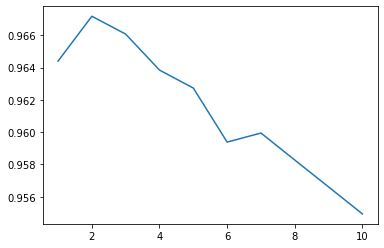

In [202]:
# plotting the accuracy against the k_values

sns.lineplot(k_values, accuracy)
plt.show()

## Conclusion

Lower k-values appeared to work best with the K-Nearest Neighbors algorithm, with a k-value of 2 yielding accuracy of .967

The upside:
 - K Nearest Neighbors is accurate at image classification.
 
The downside:
 - K Nearest Neighbors draws a lot of resources for it's prediction phase, essentially re-training the entire fitting for each new predicted value.  
 - It is very hard to see what KNN "is doing"
 


## Lower Level Analysis of Over-fitting On K Nearest Neighbors

Using cross_val_score to do our k-fold cross validation is a convenient way for measuring accuracy quickly and efficiently with less lines of code, but it does have some drawbacks.  One of these is that it doesn't allow for us to peek "under the hood" to check for over-fitting on the training subset of the data.  

So below, we will manually split our data into five folds, and make predictions not only on the "test" folds, but also on the training folds so we can see how the accuracy of predictions compares between the two.  If the accuracy is higher on the train folds than on the testing folds, we can tell there is over-fitting.

Everything looks as expected in our splitting function.  Now we need to write a function to iterate over the data and features, performing kfold cross validation as well as testing our K Nearest Neighbors algorithm to make predictions on the training data as well as the testing data...

In [203]:
#importing accuracy score since we are no longer using cross_val_score, which does this for us
from sklearn.metrics import accuracy_score

# writing function to perform low level K-fold cross validation and check for over-fitting

def over_fit(data, labels):
    # create datafram to hold our testing results
    df = pd.DataFrame(columns=['k', 'training_accuracy', 'testing_accuracy'])

    # shuffling index of data and labels
    shuffled_index = np.random.RandomState(42).permutation(data.index) 
    shuffled_data = data.iloc[shuffled_index].reset_index(drop=True)
    shuffled_labels = labels.iloc[shuffled_index].reset_index(drop=True)
    k_values = [1,2,3,4,5,6,7,8,9,10]  # different k_values for hyperparameter optimization

    #creating loop to perform k_fold cross_validation
    for i in range(5):
        index_start = int(len(shuffled_data)/5) * i
        index_end = int(len(shuffled_data)/5) * (i+1)
        
        # using index range to pick out 1/5 of the data for test data each run
        test_features = shuffled_data.iloc[index_start:index_end]
        test_labels = shuffled_labels.iloc[index_start:index_end]
        
        # dropping the test data to create the other 4/5 as training data for each run
        train_features = shuffled_data.drop(test_features.index)
        train_labels = shuffled_labels.drop(test_labels.index)

            # creating loop to use each k-value in k-value list
        for k in k_values:
            row_for_df = []
            
            knn = KNeighborsClassifier(n_neighbors=k, n_jobs=8)
            knn.fit(train_features, train_labels)
            
            #calculating accuracy on training data 
            train_predict = knn.predict(train_features)
            train_accuracy = accuracy_score(train_labels, train_predict)
            
            #calculating accuracy on testing data
            test_predict = knn.predict(test_features)
            test_accuracy = accuracy_score(test_labels, test_predict)
            
            # appending data to row_for_df, and then appending to our dataframe for easy plotting
            row_for_df.append([k, train_accuracy, test_accuracy])
            series_to_append = pd.DataFrame(row_for_df, columns=['k', 'training_accuracy', 'testing_accuracy'])
            df = pd.concat([df, series_to_append], axis=0, sort=True)
        
        # averaging the accuracy of each fold for both training predictions and testing predictions
        df.reset_index(drop=True, inplace=True)  
        df = df.groupby('k').mean()
        
            
    return df

# testing our function for KNN accuracy across training and testing data by k-value
accuracy = over_fit(data, labels)
accuracy
        
    


,testing_accuracy,training_accuracy
k,,
1.0,0.983287,1.000000
2.0,0.977716,0.990960
3.0,0.988858,0.992350
4.0,0.974930,0.991655
5.0,0.983287,0.990264
6.0,0.977716,0.986787
7.0,0.983287,0.988873
8.0,0.980501,0.988178
9.0,0.977716,0.986787


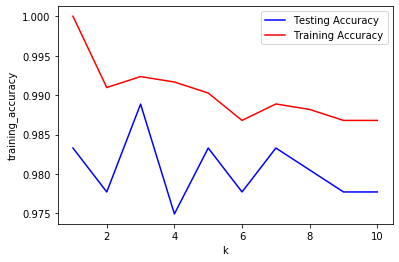

In [204]:
sns.lineplot(x=accuracy.index, y=accuracy.testing_accuracy, label="Testing Accuracy", color='blue')
sns.lineplot(x=accuracy.index, y=accuracy.training_accuracy, label="Training Accuracy", color='red')

plt.show()

## Conclusions

There is a very clear mark where the k-value of KNN is set to 1, where the accuracy on the training data is at 100%, but the accuracy of the testing data is lower than optimal.

As the k-value increases to 3, the training accuracy drops, and the testing accuracy increases.  This means that in this case, having a very low k-value resulted in over-fitting of the data.

Looking at the graph closely, it seems to follow the "elbow rule" where once the training accuracy stops to drop steeply, we are nearly optimized as far as over-fitting is concerned.

## Single Hidden Layer Neural Network Performance and Accuracy

Next, we will try to predict the images using a neural network with a single  hidden layer to see how the performance/accuracy compares.

In [205]:
# importing relevant modules
from sklearn.neural_network import MLPClassifier

neurons = [8,16,32,64,128,256,512]   # number of neurons in our single hidden layer NN

nn_accuracy = []     # empty list to hold accuracy measure for each NN with differing neuron count

for n in neurons:
    # creating NN with 'n' number of neurons in single hidden layer
    mlp = MLPClassifier(hidden_layer_sizes=(n,), random_state=0)  
    
    # list of accuracy scores for each k-fold
    scores = cross_val_score(mlp, data, labels, cv=5, scoring='accuracy', n_jobs=8) 
    
    # appending mean accuracy score to nn_accuracy list
    nn_accuracy.append(scores.mean())                 
    
nn_accuracy

[0.8024636335499846,
 0.9087403280718045,
 0.9260213556174559,
 0.934348498916744,
 0.9360229031259673,
 0.9577143299288146,
 0.9426942123181676]

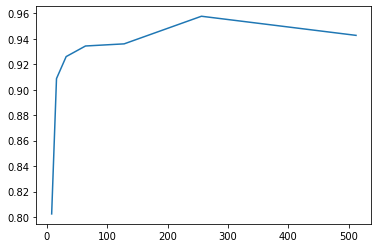

In [206]:
# plotting neuron count against accuracy

sns.lineplot(neurons,nn_accuracy)
plt.show()

## Conclusions

- The single hidden layer neural network is increasingly accurate the more neurons added to the single hidden layer 

- Although the training time is long, the prediction time is much faster than KNN

- The accuracy of the single hidden layer neural network with 256 neurons nearly matched the accuracy of the KNN algorithm with hyperparameter optimization.



## Neural Net Performance With Two Hidden Layers

Since adding more neurons to a single hidden layer resulted in a higher accuracy the more neurons we added, the next logical step would be to see if adding additional layers of neurons increases the accuracy of our model.  We will make some minor alterations to our previous neural net code to allow for an additional hidden layer.

In [207]:
dual_neurons = [(64,64), (128,128), (256,256), (512,512)]   # number of neurons in our double hidden layer NN

nn_accuracy = []     # empty list to hold accuracy measure for each NN with differing neuron count

for n in dual_neurons:
    # creating NN with 'n' number of neurons in single hidden layer
    mlp = MLPClassifier(hidden_layer_sizes=n, random_state=0)  
    
    # list of accuracy scores for each k-fold
    scores = cross_val_score(mlp, data, labels, cv=5, scoring='accuracy', n_jobs=8) 
    
    # appending mean accuracy score to nn_accuracy list
    nn_accuracy.append(scores.mean())                 
    
nn_accuracy

[0.9338053234292788,
 0.9404596100278552,
 0.9532729805013928,
 0.9515970287836583]

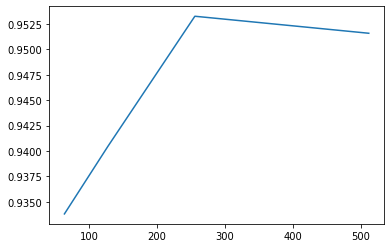

In [208]:
# plotting accuracy of dual hidden layer neural net

x = [x[0] for x in dual_neurons]  # list comprehension of the first number of neurons in each run
y = nn_accuracy

sns.lineplot(x,y)
plt.show()




## Conclusions

Overall, the optimized dual hidden layer neural network performed almost exactly as well as the single hidden layer version of our model.  Adding the 2nd layer in this case was not worth the extra processing power, and slightly underperformed the single hidden layer version in accuracy.  The difference was so close that changing the amount of k-folds could easily swing the balance, and it is within the margin of error of our experimentation.

Using more hidden layers is known by experts to result in more over-fitting of the data.  To avoid this coming through in our testing, we will try to use a larger number of k-folds in our cross-validation, while simultaneously increasing the number of hidden layers to three.

## Three Hidden Layer Neural Network With 6-K-Fold Cross-validation

We will perform the same task from before, but with three hidden layers with varying amounts of neurons, and 6 folds in our cross_val_score function.

In [209]:
trip_neurons = [(10,10,10), (64,64,64), (256,256), (128,128,128)]   # number of neurons in our triple hidden layer NN

nn_accuracy = []     # empty list to hold accuracy measure for each NN with differing neuron count

for n in dual_neurons:
    # creating NN with 'n' number of neurons in single hidden layer
    mlp = MLPClassifier(hidden_layer_sizes=n, random_state=0)  
    
    # list of accuracy scores for each k-fold
    scores = cross_val_score(mlp, data, labels, cv=6, scoring='accuracy', n_jobs=8) 
    
    # appending mean accuracy score to nn_accuracy list
    nn_accuracy.append(scores.mean())                 
    
nn_accuracy

[0.9510219249349684,
 0.9504756596060945,
 0.9638331475287997,
 0.9593775548123377]

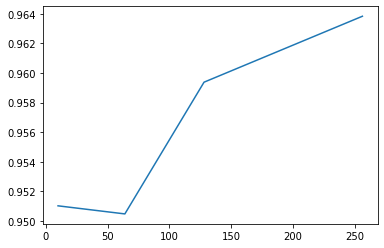

In [210]:
# plotting accuracy of dual hidden layer neural net

x = [x[0] for x in trip_neurons]  # list comprehension of the first number of neurons in each run
y = nn_accuracy

sns.lineplot(x,y)
plt.show()




## Conclusions

Three layer neural networks were able to outperform the single and double-layer neural nets by ~1% in accuracy, which could be a large improvement when dealing with large numbers.

The large number of k-folds should remove any worries of over-fitting of the data, but to see where it is occurring, we will next do a lower-level breakdown of each k-fold to chart where the training prediction accuracy is high and the testing prediction accuracy is low.

## Lower Level Analysis of Over-fitting On MLPClassifier


In [211]:
# modifying former function to perform low level K-fold cross validation and check for over-fitting

def over_fit(data, labels, activation_func='relu'):
    # create datafram to hold our testing results
    df = pd.DataFrame(columns=['neurons', 'training_accuracy', 'testing_accuracy'])

    # shuffling index of data and labels
    shuffled_index = np.random.RandomState(42).permutation(data.index) 
    shuffled_data = data.iloc[shuffled_index].reset_index(drop=True)
    shuffled_labels = labels.iloc[shuffled_index].reset_index(drop=True)

    #creating loop to perform k_fold cross_validation
    for i in range(6):
        index_start = int(len(shuffled_data)/6) * i
        index_end = int(len(shuffled_data)/6) * (i+1)
        
        # using index range to pick out 1/6 of the data for test data each run
        test_features = shuffled_data.iloc[index_start:index_end]
        test_labels = shuffled_labels.iloc[index_start:index_end]
        
        # dropping the test data to create the other 4/5 as training data for each run
        train_features = shuffled_data.drop(test_features.index)
        train_labels = shuffled_labels.drop(test_labels.index)

            # creating loop to use each k-value in k-value list
        for n in trip_neurons:
            row_for_df = []
            
            mlp = MLPClassifier(hidden_layer_sizes=n, random_state=0, activation=activation_func)
            mlp.fit(train_features, train_labels)
            
            #calculating accuracy on training data 
            train_predict = mlp.predict(train_features)
            train_accuracy = accuracy_score(train_labels, train_predict)
            
            #calculating accuracy on testing data
            test_predict = mlp.predict(test_features)
            test_accuracy = accuracy_score(test_labels, test_predict)
            
            # appending data to row_for_df, and then appending to our dataframe for easy plotting
            row_for_df.append([n[0], train_accuracy, test_accuracy])
            series_to_append = pd.DataFrame(row_for_df, columns=['neurons', 'training_accuracy', 'testing_accuracy'])
            df = pd.concat([df, series_to_append], axis=0, sort=True)
        
        # averaging the accuracy of each fold for both training predictions and testing predictions
        df.reset_index(drop=True, inplace=True)  
        df = df.groupby('neurons').mean()
        
            
    return df

# testing our function for KNN accuracy across training and testing data by k-value
accuracy = over_fit(data, labels)
accuracy


C:\Users\CliffGaming\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\CliffGaming\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\CliffGaming\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\CliffGaming\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

,testing_accuracy,training_accuracy
neurons,,
10.0,0.933110,0.991989
64.0,0.979933,1.000000
128.0,0.969900,1.000000
256.0,0.989967,1.000000


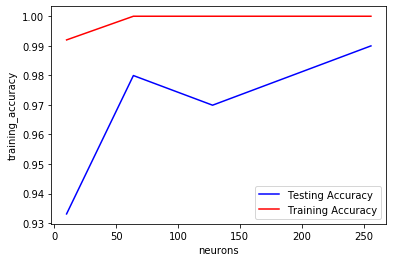

In [212]:
# plotting training accuracy vs testing accuracy for each number of neurons 
# on our three hidden layer neural network

sns.lineplot(x=accuracy.index, y=accuracy.testing_accuracy, label="Testing Accuracy", color='blue')
sns.lineplot(x=accuracy.index, y=accuracy.training_accuracy, label="Training Accuracy", color='red')

plt.show()

## Conclusions

In our case, the three hidden layer neural network almost perfectly over-fit the training data no matter which amount of neurons we tested on each layer.

By using our cross-validation, we were able to ignore the over-fitting by only choosing the model that best predicted the testing data.  In our case, using three hidden layers and 256 neurons per layer resulted in the optimal accuracy, predicting the unseen test data with an average accuracy score of nearly 99%.  

The difference between our low-level cross-validation accuracy score and the cross_val_score functions results using 256 neurons is likely a factor of the different form of randomization used to shuffle our dataset for our manual splitting versus the "under the hood" usage within cross_val_score.  In the future experiments, we will be using cross_val_score exclusively to explore other activation functions and algorithms.

## Experimentations Using Different Activation Functions

Sticking with our three hidden layer neural network, let's see how the accuracy changes depending on the activation function used within the MLP object.

In [213]:
# identity activation function

accuracy = over_fit(data, labels, 'identity')
accuracy

C:\Users\CliffGaming\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\CliffGaming\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\CliffGaming\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\CliffGaming\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

,testing_accuracy,training_accuracy
neurons,,
10.0,0.939799,0.977971
64.0,0.939799,1.000000
128.0,0.949833,1.000000
256.0,0.949833,1.000000


In [214]:
# tanh activation function

accuracy = over_fit(data, labels, 'tanh')
accuracy

C:\Users\CliffGaming\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\CliffGaming\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\CliffGaming\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\CliffGaming\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

,testing_accuracy,training_accuracy
neurons,,
10.0,0.923077,0.979973
64.0,0.966555,1.000000
128.0,0.976589,1.000000
256.0,0.979933,1.000000


In [215]:
# logistic activation function

accuracy = over_fit(data, labels, 'logistic')
accuracy



C:\Users\CliffGaming\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\CliffGaming\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\CliffGaming\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\CliffGaming\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

,testing_accuracy,training_accuracy
neurons,,
10.0,0.839465,0.90988
64.0,0.959866,1.00000
128.0,0.963211,1.00000
256.0,0.973244,1.00000


## Conclusions

Relu provided the most accuracy results, with logistic and tanh following closely behind.  The identity function, unsurprisingly performed worse, since it performed no output change at all after weights were adjusted within the connections of the neural network.

## Random Forest Classifier

We will now test the Random Forest Classifier to see how well it can perform compared to a neural net or a knn algorithm.



In [216]:
# importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

accuracies = []  # to keep track of accuracy from each forest with varying number of trees

trees = [100,300,500,1000]   # number of trees in random forest


# looping through tree list and making predictions using random forests
for tree in trees:
    rf = RandomForestClassifier(n_estimators=tree, random_state=0, n_jobs=8)  # creating random forest object

    scores = cross_val_score(rf, data, labels, cv=6, scoring='accuracy', n_jobs=8) # performing k-fold cross_validation)
    accuracy = scores.mean()
    accuracies.append(accuracy)
    
for i in range(4):
    print('Tree: ', trees[i], 'Accuracy: ', accuracies[i])
    

Tree:  100 Accuracy:  0.9510423634336679
Tree:  300 Accuracy:  0.9527034559643255
Tree:  500 Accuracy:  0.9510349312523224
Tree:  1000 Accuracy:  0.9521423262727611


## Conclusion

Random Forest was not as accurate at image classification as a neural network.  The number of trees didn't seem to increase accuracy much at all.